This is a generic script for finetuning ViLT model for VQA tasks
Simply format your data as per the requirements below and this should work.

## Data format
* the images (stored in a single folder)
* the questions (stored in a JSON) -- with following
* the annotations (stored in a JSON) a.k.a. the answers to the questions.

Refer to https://github.com/multimodal/multimodal/blob/master/test/data/vqa2/val/v2_OpenEnded_mscoco_val2014_questions.json for a sample of how question json file should look like.

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


This piece of code converts data in VLQAv1 into desired format. If multiple images are there, it automatically merges them into one.

In [ ]:
prefix = 'blocksworld_truncated'

In [ ]:
from PIL import Image
import os

os.chdir('/content')

def mergeim(impath1,impath2):
  if impath1.endswith(".jpg"):
    postfix = ".jpg"
  elif impath1.endswith(".png"):
    postfix = ".png"
  else:
    print("no jpg or png file supplied")
  newname = 'Merged_'+impath1.split("/")[-1].rstrip(postfix) + "#"+ impath2.split("/")[-1].rstrip(postfix) + postfix
  #print(newname)
  image1 = Image.open(impath1)
  image2 = Image.open(impath2)
  image1_size = image1.size
  image2_size = image2.size
  new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
  new_image.paste(image1,(0,0))
  new_image.paste(image2,(image1_size[0],0))
  new_image.save("./images/"+newname)
  #new_image.show()
  return "./images/"+newname

mergeim('./images/BW_1_0.jpg','./images/BW_1_1.jpg')

'./images/Merged_BW_1_0#BW_1_1.jpg'

In [ ]:
#!rm /content/blocksworld_truncated_viltft.jsonl

import json
import ast

dumpdict = { "info": {}, "task_type": "Open-Ended", "data_type": "mscoco", "license": {}, "data_subtype": prefix,
    "questions": [] }

with open('/content/'+prefix+'.jsonl') as f:
  data = f.readlines()
  print(len(data))
  for i in data:
    ijson = json.loads(i)
    imlist = ast.literal_eval(ijson['images'])
    anslist = [str(i) for i in ast.literal_eval(ijson['answer_choices'])]
    if len(imlist) == 2:
      mpath = mergeim(imlist[0], imlist[1])
    dumpdict['questions'].append( { "image_id": mpath, "question": ijson['question']+" "+ijson['passage'], "question_id": ijson['qid'], "answer_choices": anslist, "answer_id": int(ijson['answer']) } )

with open('/content/'+prefix+'_viltft.jsonl','w+') as w:
  w.write(json.dumps(dumpdict,indent=4))

print(dumpdict)

250
{'info': {}, 'task_type': 'Open-Ended', 'data_type': 'mscoco', 'license': {}, 'data_subtype': 'blocksworld_truncated', 'questions': [{'image_id': './images/Merged_BW_1_0#BW_1_1.jpg', 'question': 'In how many moves one can convert left image into right image? Blocks can be moved (i) if there is no other block on it (ii) only one block can be moved at a time (iii) block can be moved OnTable, OutOfTable or on any other block.', 'question_id': 0, 'answer_choices': ['1', '5', '2', '3'], 'answer_id': 0}, {'image_id': './images/Merged_BW_2_0#BW_2_1.jpg', 'question': 'In how many moves one can convert left image into right image? Blocks can be moved (i) if there is no other block on it (ii) only one block can be moved at a time (iii) block can be moved OnTable, OutOfTable or on any other block.', 'question_id': 1, 'answer_choices': ['4', '5', '2', '1'], 'answer_id': 3}, {'image_id': './images/Merged_BW_3_0#BW_3_1.jpg', 'question': 'In how many moves one can convert left image into right im

### Read questions

First, we read the questions.

In [ ]:
import json
f = open('/content/'+prefix+'_viltft.jsonl','r')
data_questions = json.load(f)
questions = data_questions['questions']

print(data_questions.keys())
print("Number of questions:", len(questions))

dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions'])
Number of questions: 250


That's quite a lot! Let's take a look at the first one:

In [ ]:
questions[0]

{'image_id': './images/Merged_BW_1_0#BW_1_1.jpg',
 'question': 'In how many moves one can convert left image into right image? Blocks can be moved (i) if there is no other block on it (ii) only one block can be moved at a time (iii) block can be moved OnTable, OutOfTable or on any other block.',
 'question_id': 0,
 'answer_choices': ['1', '5', '2', '3'],
 'answer_id': 0}

In [ ]:
from os import listdir
from os.path import isfile, join

# -- CHANGE THIS BASED ON WHERE IMAGES ARE STORED --
root = '/content/images'

file_names = [f for f in listdir(root) if isfile(join(root, f))]
print(file_names)
print(len(file_names))

['BW_33_1.jpg', 'BW_90_0.jpg', 'BW_75_1.jpg', 'BW_69_1.jpg', 'BW_91_1.jpg', 'BW_76_1.jpg', 'BW_61_1.jpg', 'BW_44_1.jpg', 'BW_48_1.jpg', 'BW_26_0.jpg', 'Merged_BW_69_0#BW_69_1.jpg', 'Merged_BW_86_0#BW_86_1.jpg', 'BW_87_0.jpg', 'Merged_BW_38_0#BW_38_1.jpg', 'BW_11_1.jpg', 'Merged_BW_96_0#BW_96_1.jpg', 'BW_91_0.jpg', 'Merged_BW_30_0#BW_30_1.jpg', 'BW_49_1.jpg', 'Merged_BW_99_0#BW_99_1.jpg', 'Merged_BW_10_0#BW_10_1.jpg', 'BW_24_1.jpg', 'BW_79_0.jpg', 'BW_57_0.jpg', 'BW_74_0.jpg', 'Merged_BW_91_0#BW_91_1.jpg', 'BW_44_0.jpg', 'BW_54_1.jpg', 'BW_68_1.jpg', 'BW_70_0.jpg', 'BW_93_1.jpg', 'Merged_BW_88_0#BW_88_1.jpg', 'Merged_BW_3_0#BW_3_1.jpg', 'Merged_BW_34_0#BW_34_1.jpg', 'Merged_BW_68_0#BW_68_1.jpg', 'Merged_BW_42_0#BW_42_1.jpg', 'BW_80_0.jpg', 'Merged_BW_67_0#BW_67_1.jpg', 'Merged_BW_80_0#BW_80_1.jpg', 'BW_89_1.jpg', 'BW_9_1.jpg', 'Merged_BW_56_0#BW_56_1.jpg', 'BW_65_1.jpg', 'BW_25_1.jpg', 'BW_43_0.jpg', 'BW_33_0.jpg', 'BW_6_0.jpg', 'BW_34_1.jpg', 'Merged_BW_20_0#BW_20_1.jpg', 'BW_10_1.jpg'

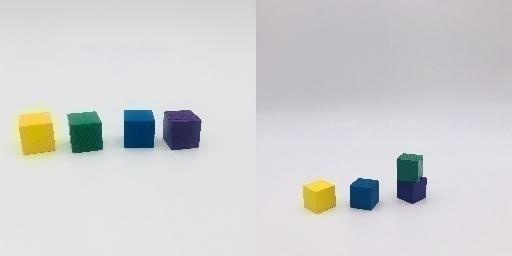

In [ ]:
from PIL import Image

path = questions[0]['image_id']
image = Image.open(path)
image

In [ ]:
from transformers import ViltConfig

config = ViltConfig.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

## Create PyTorch dataset

Next, we create a regular [PyTorch dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). We leverage `ViltProcessor` to prepare each image + text pair for the model, which will automatically:
* leverage `BertTokenizerFast` to tokenize the text and create `input_ids`, `attention_mask` and `token_type_ids`
* leverage `ViltFeatureExtractor` to resize + normalize the image and create `pixel_values` and `pixel_mask`.

Note that the docs of `ViltProcessor` can be found [here](https://huggingface.co/docs/transformers/master/en/model_doc/vilt#transformers.ViltProcessor).

We also add the labels. This is a PyTorch tensor of shape `(num_labels,)` that contains the soft encoded vector.

In [ ]:
import torch
from PIL import Image

class VQADataset(torch.utils.data.Dataset):

    def __init__(self, questions, processor): #annotations
        self.questions = questions
        #self.annotations = annotations
        self.processor = processor

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        # get image + text
        #annotation = self.annotations[idx]
        questions = self.questions[idx]
        #image = Image.open(id_to_filename[annotation['image_id']])
        image = Image.open(questions['image_id'])
        text = questions['question']
        #print(image)
        #print(text)
        encoding = self.processor(image, text, padding="max_length", truncation=True, return_tensors="pt")
        # remove batch dimension
        for k,v in encoding.items():
          encoding[k] = v.squeeze()
        # add labels
        #labels = questions['answer_choices'][questions['answer_id']] #annotation['labels']
        #scores = [1.0] #annotation['scores']
        # based on: https://github.com/dandelin/ViLT/blob/762fd3975c180db6fc88f577cf39549983fa373a/vilt/modules/objectives.py#L301
        #print(len(questions['answer_choices']))
        targets = torch.zeros(len(questions['answer_choices']))
        targets[questions['answer_id']] = 1.0
        #print(targets)
        #for label, score in zip(labels, scores):
        #      targets[label] = score
        encoding["labels"] = targets
        #print(encoding)
        #print(labels)
        #print(scores)

        return encoding

In [ ]:
from transformers import ViltProcessor

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")

In [ ]:
# 4wT
#dataset = VQADataset(questions=questions[:100],processor=processor) ##annotations=annotations[:10],
# 4wS
#dataset = VQADataset(questions=questions[100:150],processor=processor) ##annotations=annotations[:10],
# Bin
dataset = VQADataset(questions=questions[150:250],processor=processor) ##annotations=annotations[:10],

In [ ]:
dataset[1].keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'pixel_values', 'pixel_mask', 'labels'])

In [ ]:
processor.decode(dataset[0]['input_ids'])

'[CLS] there are 1 moves required convert left image into right image. blocks can be moved ( i ) if there is no other block on it ( ii ) only one block can be moved at a [SEP]'

In [ ]:
labels = torch.nonzero(dataset[0]['labels']).squeeze().tolist()

## Define model

Here we define a `ViltForQuestionAnswering` model, with the weights of the body initialized from dandelin/vilt-b32-mlm, and a randomly initialized classification head. We also move it to the GPU, if it's available.

In [ ]:
from transformers import ViltForQuestionAnswering

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm", num_labels=2)
                                                 #len(config.id2label))
                                                 #id2label=config.id2label,
                                                 #label2id=config.label2id)
model.to(device)

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.3.bias', 'classifier.0.bias', 'classifier.1.bias', 'classifier.1.weight', 'classifier.0.weight', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViltForQuestionAnswering(
  (vilt): ViltModel(
    (embeddings): ViltEmbeddings(
      (text_embeddings): TextEmbeddings(
        (word_embeddings): Embedding(30522, 768)
        (position_embeddings): Embedding(40, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (patch_embeddings): ViltPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (token_type_embeddings): Embedding(2, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViltEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViltLayer(
          (attention): ViltAttention(
            (attention): ViltSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=76

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  input_ids = [item['input_ids'] for item in batch]
  pixel_values = [item['pixel_values'] for item in batch]
  #print(pixel_values)
  attention_mask = [item['attention_mask'] for item in batch]
  token_type_ids = [item['token_type_ids'] for item in batch]
  labels = [item['labels'] for item in batch]

  # create padded pixel values and corresponding pixel mask
  #encoding = processor.feature_extractor.pad_and_create_pixel_mask(pixel_values, return_tensors="pt")

  # create new batch
  batch = {}
  batch['input_ids'] = torch.stack(input_ids)
  batch['attention_mask'] = torch.stack(attention_mask)
  batch['token_type_ids'] = torch.stack(token_type_ids)
  batch['pixel_values'] = torch.stack(pixel_values) #encoding['pixel_values']
  #batch['pixel_mask'] = encoding['pixel_mask']
  batch['labels'] = torch.stack(labels)

  return batch

train_dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=1, shuffle=True)

Let's verify a batch:

In [ ]:
batch = next(iter(train_dataloader))

In [ ]:
for k,v in batch.items():
  print(k, v.shape)

input_ids torch.Size([1, 40])
attention_mask torch.Size([1, 40])
token_type_ids torch.Size([1, 40])
pixel_values torch.Size([1, 3, 320, 608])
labels torch.Size([1, 2])


## Train a model

Finally, let's train a model!

In [ ]:
from tqdm.notebook import tqdm
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# -- CHANGE BASED ON HOW MANY EPOCHS YOU WANT TO RUN FOR
e = 5

model.train()
for epoch in range(e):  # loop over the dataset multiple times
   print(f"Epoch: {epoch}")
   for batch in tqdm(train_dataloader):
        # get the inputs;
        batch = {k:v.to(device) for k,v in batch.items()}

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(**batch)
        loss = outputs.loss
        print("Loss:", loss.item())
        loss.backward()
        optimizer.step()

Epoch: 0


  0%|          | 0/100 [00:00<?, ?it/s]

Loss: 1.1826729774475098
Loss: 1.2078255414962769
Loss: 0.8119869232177734
Loss: 0.5097695589065552
Loss: 0.34726083278656006
Loss: 0.17541447281837463
Loss: 5.917224884033203
Loss: 0.21607640385627747
Loss: 0.2155434787273407
Loss: 0.16063229739665985
Loss: 0.13446027040481567
Loss: 5.557257652282715
Loss: 5.096312046051025
Loss: 4.254598140716553
Loss: 0.4328175187110901
Loss: 0.5586974024772644
Loss: 2.5588433742523193
Loss: 2.247220993041992
Loss: 1.1235395669937134
Loss: 1.2314858436584473
Loss: 1.0576341152191162
Loss: 2.1545610427856445
Loss: 1.979036569595337
Loss: 1.6739490032196045
Loss: 1.5028208494186401
Loss: 0.8311372995376587
Loss: 2.7062606811523438
Loss: 0.7091532349586487
Loss: 2.540620803833008
Loss: 0.7629868984222412
Loss: 0.6805062294006348
Loss: 2.5609703063964844
Loss: 2.1568551063537598
Loss: 1.133060336112976
Loss: 1.357870101928711
Loss: 1.2513561248779297
Loss: 1.6954272985458374
Loss: 1.7701137065887451
Loss: 1.588085412979126
Loss: 1.468968152999878
Loss: 

  0%|          | 0/100 [00:00<?, ?it/s]

Loss: 2.043677806854248
Loss: 1.0440689325332642
Loss: 0.8036999702453613
Loss: 2.324187755584717
Loss: 2.0524559020996094
Loss: 0.7622268795967102
Loss: 2.2787744998931885
Loss: 2.2082250118255615
Loss: 1.0282601118087769
Loss: 1.9524693489074707
Loss: 1.6626882553100586
Loss: 1.2457456588745117
Loss: 1.32089102268219
Loss: 1.2652156352996826
Loss: 1.3265295028686523
Loss: 1.4877839088439941
Loss: 1.2891840934753418
Loss: 1.5294291973114014
Loss: 1.236067771911621
Loss: 1.2317194938659668
Loss: 1.1567189693450928
Loss: 1.707094430923462
Loss: 1.7511482238769531
Loss: 1.738649845123291
Loss: 1.1256359815597534
Loss: 1.1351245641708374
Loss: 1.6631596088409424
Loss: 1.6232991218566895
Loss: 1.5783865451812744
Loss: 1.5034751892089844
Loss: 1.308883547782898
Loss: 1.1728333234786987
Loss: 1.1016430854797363
Loss: 0.8939774036407471
Loss: 0.7677045464515686
Loss: 0.7288697361946106
Loss: 2.8381690979003906
Loss: 3.0047669410705566
Loss: 3.0762696266174316
Loss: 2.8372182846069336
Loss: 0.

  0%|          | 0/100 [00:00<?, ?it/s]

Loss: 2.4290316104888916
Loss: 2.307457447052002
Loss: 2.096458911895752
Loss: 1.035606026649475
Loss: 0.7212966680526733
Loss: 0.6955127716064453
Loss: 1.5437955856323242
Loss: 1.1749811172485352
Loss: 1.4531714916229248
Loss: 1.4160712957382202
Loss: 1.1717791557312012
Loss: 1.4419598579406738
Loss: 1.3271214962005615
Loss: 1.3651292324066162
Loss: 0.952293872833252
Loss: 0.6048111915588379
Loss: 0.9380406737327576
Loss: 1.3005129098892212
Loss: 2.1523499488830566
Loss: 1.015347957611084
Loss: 1.3393181562423706
Loss: 1.3602492809295654
Loss: 0.34881657361984253
Loss: 0.43111783266067505
Loss: 0.2607415020465851
Loss: 1.7039601802825928
Loss: 1.1388121843338013
Loss: 1.1786551475524902
Loss: 1.0835281610488892
Loss: 0.9361351728439331
Loss: 0.6662513017654419
Loss: 0.8232088088989258
Loss: 0.20703135430812836
Loss: 0.4059767723083496
Loss: 0.1629159152507782
Loss: 0.5247690677642822
Loss: 3.9704413414001465
Loss: 0.3248024582862854
Loss: 0.23726019263267517
Loss: 0.3871021270751953
L

  0%|          | 0/100 [00:00<?, ?it/s]

Loss: 0.10672038048505783
Loss: 0.01453469693660736
Loss: 0.11035756766796112
Loss: 0.01221814937889576
Loss: 0.09966544061899185
Loss: 0.5462111830711365
Loss: 0.01015570480376482
Loss: 0.08344163745641708
Loss: 0.4754723906517029
Loss: 0.009297414682805538
Loss: 3.4156408309936523
Loss: 0.06332661211490631
Loss: 0.05423816666007042
Loss: 3.261465311050415
Loss: 0.008944946341216564
Loss: 0.05542772635817528
Loss: 0.5096840858459473
Loss: 0.5302850008010864
Loss: 0.008625643327832222
Loss: 0.04236593097448349
Loss: 0.008546775206923485
Loss: 0.5611177086830139
Loss: 0.008176975883543491
Loss: 0.007922768592834473
Loss: 0.031919702887535095
Loss: 0.5443398952484131
Loss: 0.007348488084971905
Loss: 2.923701524734497
Loss: 0.5378473401069641
Loss: 0.006897338666021824
Loss: 0.5465911626815796
Loss: 0.5513515472412109
Loss: 0.5442150831222534
Loss: 0.006244199816137552
Loss: 0.5393102169036865
Loss: 0.023919016122817993
Loss: 1.9992704391479492
Loss: 0.47310853004455566
Loss: 0.0232293941

  0%|          | 0/100 [00:00<?, ?it/s]

Loss: 3.955784797668457
Loss: 3.2157750129699707
Loss: 2.4684255123138428
Loss: 0.3876035213470459
Loss: 1.0332558155059814
Loss: 0.011212565004825592
Loss: 1.017177700996399
Loss: 1.5895532369613647
Loss: 0.027156751602888107
Loss: 0.011476963758468628
Loss: 1.2588562965393066
Loss: 1.2399756908416748
Loss: 1.0259780883789062
Loss: 0.8207900524139404
Loss: 0.011879025027155876
Loss: 1.103230595588684
Loss: 0.5590971112251282
Loss: 0.009568119421601295
Loss: 1.494301199913025
Loss: 0.32012444734573364
Loss: 0.28860706090927124
Loss: 0.23445971310138702
Loss: 0.0070978133007884026
Loss: 0.0084376260638237
Loss: 0.17260734736919403
Loss: 4.412792205810547
Loss: 0.11550228297710419
Loss: 3.71938419342041
Loss: 0.2920165956020355
Loss: 1.9815412759780884
Loss: 0.011114634573459625
Loss: 1.1529386043548584
Loss: 0.007289067842066288
Loss: 0.6529918909072876
Loss: 0.007767421193420887
Loss: 2.6722073554992676
Loss: 2.632190704345703
Loss: 2.46545147895813
Loss: 1.663359522819519
Loss: 0.0084

## Inference

Let's verify whether the model has actually learned something:

# Single Instance Inference

In [ ]:
exid = 1
example = dataset[exid]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'pixel_values', 'pixel_mask', 'labels'])


In [ ]:
# add batch dimension + move to GPU
example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}

# forward pass
outputs = model(**example)

In [ ]:
logits = outputs.logits
predicted_class = logits.argmax(-1).item()
print("Predicted answer:", predicted_class)
print("Ground-truth answer:", dataset[exid]['labels'].argmax(-1).item())

Predicted answer: 0
Ground-truth answer: 3


# Batch Inference

In [ ]:
import csv
tasktype = "bin"
filprefix = prefix+"_"+tasktype

# Accuracy of bin blocksworld data truncated - finetuned by ViLT
count = 0
st = 0
end = 99
with open(filprefix+'.csv', 'w+') as k:
  spamwriter = csv.writer(k)
  spamwriter.writerow(["qid","pred_ans","gt_ans","correctness"])
  for exid in range(st,end+1):
    correctness = 0
    example = dataset[exid]
    example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}
    outputs = model(**example)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item()
    gtclass = dataset[exid]['labels'].argmax(-1).item()
    if gtclass==predicted_class:
      count+=1
      correctness = 1
    print([exid,predicted_class, gtclass,correctness])
    spamwriter.writerow([exid,predicted_class, gtclass,correctness])
acc = count*100/(end-st+1)

print(count)
print(end-st+1)
print(acc)

[0, 0, 0, 1]
[1, 0, 0, 1]
[2, 0, 1, 0]
[3, 0, 1, 0]
[4, 0, 1, 0]
[5, 0, 0, 1]
[6, 0, 1, 0]
[7, 0, 0, 1]
[8, 0, 0, 1]
[9, 0, 0, 1]
[10, 0, 0, 1]
[11, 0, 0, 1]
[12, 0, 0, 1]
[13, 0, 0, 1]
[14, 1, 1, 1]
[15, 1, 1, 1]
[16, 0, 1, 0]
[17, 0, 1, 0]
[18, 0, 1, 0]
[19, 1, 1, 1]
[20, 0, 1, 0]
[21, 0, 1, 0]
[22, 0, 0, 1]
[23, 0, 0, 1]
[24, 0, 0, 1]
[25, 0, 0, 1]
[26, 1, 1, 1]
[27, 0, 0, 1]
[28, 0, 1, 0]
[29, 0, 0, 1]
[30, 0, 0, 1]
[31, 0, 0, 1]
[32, 0, 0, 1]
[33, 0, 1, 0]
[34, 0, 0, 1]
[35, 0, 0, 1]
[36, 0, 0, 1]
[37, 0, 0, 1]
[38, 0, 0, 1]
[39, 0, 0, 1]
[40, 1, 1, 1]
[41, 1, 1, 1]
[42, 0, 0, 1]
[43, 0, 0, 1]
[44, 1, 1, 1]
[45, 1, 1, 1]
[46, 1, 1, 1]
[47, 0, 0, 1]
[48, 0, 0, 1]
[49, 0, 0, 1]
[50, 1, 1, 1]
[51, 1, 1, 1]
[52, 0, 0, 1]
[53, 0, 0, 1]
[54, 0, 0, 1]
[55, 0, 0, 1]
[56, 1, 1, 1]
[57, 0, 0, 1]
[58, 1, 1, 1]
[59, 0, 0, 1]
[60, 0, 0, 1]
[61, 1, 1, 1]
[62, 1, 1, 1]
[63, 1, 1, 1]
[64, 0, 0, 1]
[65, 0, 0, 1]
[66, 0, 0, 1]
[67, 1, 1, 1]
[68, 1, 1, 1]
[69, 0, 0, 1]
[70, 0, 0, 1]
[71, 0, 0, 1]
[7

In [ ]:
import csv
tasktype = "bin"
filprefix = prefix+"_"+tasktype

# Accuracy of bin blocksworld data original - finetuned by ViLT
count = 0
st = 0
end = 99
with open(filprefix+'.csv', 'w+') as k:
  spamwriter = csv.writer(k)
  spamwriter.writerow(["qid","pred_ans","gt_ans","correctness"])
  for exid in range(st,end+1):
    correctness = 0
    example = dataset[exid]
    example = {k: v.unsqueeze(0).to(device) for k,v in example.items()}
    outputs = model(**example)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item()
    gtclass = dataset[exid]['labels'].argmax(-1).item()
    if gtclass==predicted_class:
      count+=1
      correctness = 1
    print([exid,predicted_class, gtclass,correctness])
    spamwriter.writerow([exid,predicted_class, gtclass,correctness])
acc = count*100/(end-st+1)

print(count)
print(end-st+1)
print(acc)

[0, 0, 0, 1]
[1, 0, 0, 1]
[2, 0, 1, 0]
[3, 0, 1, 0]
[4, 0, 1, 0]
[5, 0, 0, 1]
[6, 0, 1, 0]
[7, 0, 0, 1]
[8, 0, 0, 1]
[9, 0, 0, 1]
[10, 0, 0, 1]
[11, 0, 0, 1]
[12, 0, 0, 1]
[13, 0, 0, 1]
[14, 0, 1, 0]
[15, 0, 1, 0]
[16, 0, 1, 0]
[17, 0, 1, 0]
[18, 0, 1, 0]
[19, 0, 1, 0]
[20, 0, 1, 0]
[21, 0, 1, 0]
[22, 0, 0, 1]
[23, 0, 0, 1]
[24, 0, 0, 1]
[25, 0, 0, 1]
[26, 0, 1, 0]
[27, 0, 0, 1]
[28, 0, 1, 0]
[29, 0, 0, 1]
[30, 0, 0, 1]
[31, 0, 0, 1]
[32, 0, 0, 1]
[33, 0, 1, 0]
[34, 0, 0, 1]
[35, 0, 0, 1]
[36, 0, 0, 1]
[37, 0, 0, 1]
[38, 0, 0, 1]
[39, 0, 0, 1]
[40, 1, 1, 1]
[41, 1, 1, 1]
[42, 0, 0, 1]
[43, 0, 0, 1]
[44, 1, 1, 1]
[45, 1, 1, 1]
[46, 1, 1, 1]
[47, 0, 0, 1]
[48, 0, 0, 1]
[49, 0, 0, 1]
[50, 1, 1, 1]
[51, 1, 1, 1]
[52, 0, 0, 1]
[53, 0, 0, 1]
[54, 0, 0, 1]
[55, 0, 0, 1]
[56, 1, 1, 1]
[57, 0, 0, 1]
[58, 1, 1, 1]
[59, 0, 0, 1]
[60, 0, 0, 1]
[61, 1, 1, 1]
[62, 1, 1, 1]
[63, 1, 1, 1]
[64, 0, 0, 1]
[65, 0, 0, 1]
[66, 0, 0, 1]
[67, 1, 1, 1]
[68, 1, 1, 1]
[69, 0, 0, 1]
[70, 0, 0, 1]
[71, 0, 0, 1]
[7